## Observations and Insights

Markdown 
LaTeX:  𝛼2

## Dependencies and starter code

In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Check the mouse data 
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [202]:
# Check the study results data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [203]:
# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, how="left", on = 'Mouse ID')
print(merge_data.shape)
merge_data.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [204]:
# Check to see if there are any rows with missing data
merge_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [205]:
# Remove the rows with missing data
merge_data = merge_data.dropna(how="any")
merge_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [206]:
# Examining datatypes within the DataFrame
merge_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [207]:
# Display a statistical overview
merge_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


# Summary statistics

In [208]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
statistics_df = merge_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [ 'mean', 'median', 'var', 'std', 'sem' ]})    
statistics_df = statistics_df.rename(columns={
    "mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "SEM"
})
statistics_df

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar plots

In [243]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Display an overview of the Drug Regimen column

treatment_counts =  merge_data['Drug Regimen'].value_counts()
treatment_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

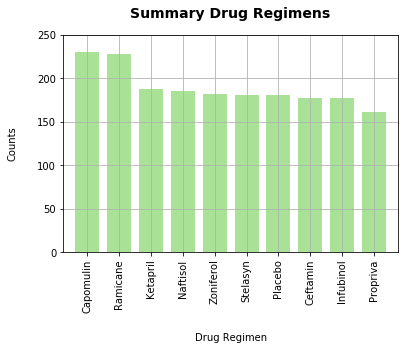

In [244]:
# Generate a bar plot using Pandas's DataFrame.plot()
pd_bar = treatment_counts.plot(kind="bar", facecolor=(0.55, 0.85, 0.45), alpha=0.75, width = 0.75)

# Create labels for the title, X and Y axis
plt.title('Summary Drug Regimens', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel("Drug Regimen", labelpad=20)
plt.ylabel("Counts",  labelpad=20)

# Set your x and y limits
plt.xlim(-0.75, len(treatment_counts)-0.25)
plt.ylim(0, max(treatment_counts)+20)

# Set a grid on the plot
plt.grid()

# Display the plot
plt.show()

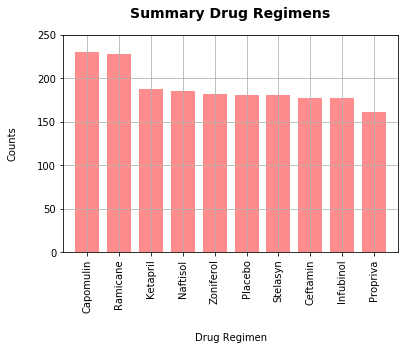

In [245]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
gr_df = merge_data.groupby("Drug Regimen", as_index=False).count()
gr_df = gr_df.sort_values(by=['Timepoint', 'Drug Regimen'], ascending=[False, True])


# total volumes for df
total_mouse = merge_data["Mouse ID"].unique()
total_drug = merge_data["Drug Regimen"].unique()
total_time = merge_data["Timepoint"].unique()

# Generate a bar plot using Matplotlib's pyplot
mt_bar = plt.bar(gr_df['Drug Regimen'], gr_df['Timepoint'], color='r', alpha=0.45, width = 0.75)

# Tell matplotlib rotation of our x axis headers
plt.xticks(rotation=90)

# Sets the x limits  and y limits of the current chart
plt.xlim(-0.75, len(gr_df['Drug Regimen'])-0.25)
plt.ylim(0, max(treatment_counts)+20)

# Give our chart some labels and a tile
plt.title('Summary Drug Regimens', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel("Drug Regimen", labelpad=20)
plt.ylabel("Counts",  labelpad=20)

# Set a grid on the plot
plt.grid()

# Display the plot
plt.show()

In [257]:
# NOTE: These plots should look identical.

merge_data = merge_data.sort_values(by = 'Drug Regimen')
merge_data['Drug Regimen'].value_counts()
# fig, axs = plt.subplots(2, 1, figsize=(7, 5), tight_layout=True)
# axs[0].plot(merge_data['Drug Regimen'].value_counts(), color=(0.55, 0.85, 0.45), alpha=0.75)
# axs[1].plot(gr_df['Drug Regimen'], gr_df['Timepoint'], color='r', alpha=0.45)

# import matplotlib
# # ticks = np.arange(0, 10, 1)
# # # list comprehension to get all tick labels...
# # axs[0].xaxis.set_ticks(ticks) 
# # axs[1].xaxis.set_ticks(ticks) 
# axs[0].tick_params(axis='x', rotation=45)
# axs[1].tick_params(axis='x', rotation=45)
# axs[0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
# axs[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

# plt.show()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [254]:
print(merge_data['Drug Regimen'].value_counts())

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64


In [255]:
print(gr_df['Drug Regimen'])

0    Capomulin
7     Ramicane
3     Ketapril
4     Naftisol
9    Zoniferol
5      Placebo
8     Stelasyn
1     Ceftamin
2    Infubinol
6     Propriva
Name: Drug Regimen, dtype: object


## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen